# Handwritten digit recognition
The goal is to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features.

## Importing Libraries and Data

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
# Importing dataset(only 20% of data)
digit_data = pd.read_csv('train.csv', nrows = 8400)
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Understanding 

In [3]:
# dimensions
print("Dimensions: ", digit_data.shape, "\n")

# data types
print(digit_data.info())
#All the column contains only integers.

Dimensions:  (8400, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.3 MB
None


In [4]:
digit_data[digit_data.isnull().any(axis=1)]
#Data does not contain any null values.

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [5]:
#Get the digits
digits = list(np.sort(digit_data['label'].unique()))
print(digits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Data Preparation

#### As all the columns contains similar kind of data(range of data). We don't have to scale them.

In [6]:
# splitting into X and y
X = digit_data.drop("label", axis = 1)
y = digit_data['label']

In [7]:
# scaling the features
X_scaled = scale(X)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

## Model Building

In [8]:
# non-linear model
# using rbf kernel, C=1, default value of gamma
# model
model = SVC(kernel='rbf')

# fit
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# predict
y_pred = model.predict(X_test)

In [10]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9341269841269841 

[[262   0   4   1   0   1   0   0   1   0]
 [  0 264   2   0   1   0   1   0   1   1]
 [  0   2 237   3   3   0   1   2   6   0]
 [  0   2   8 254   0   4   0   1   5   1]
 [  0   0   2   0 229   1   0   0   1   8]
 [  0   2   6   7   2 198   5   0   0   1]
 [  5   0   6   0   3   2 253   0   0   0]
 [  1   1   7   0   0   0   0 232   0   9]
 [  1   1   7   6   0   4   0   0 212   3]
 [  2   0   4   5   4   0   0   8   1 213]]


## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [11]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 44.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [12]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,48.765671,1.173376,5.909744,0.088482,1,0.01,"{'C': 1, 'gamma': 0.01}",0.715136,0.749150,0.696429,...,0.716667,0.018910,12,0.999787,1.000000,0.999787,0.999787,1.000000,0.999872,0.000104
1,14.229678,0.896718,3.751540,0.098112,1,0.001,"{'C': 1, 'gamma': 0.001}",0.920068,0.926020,0.909014,...,0.917687,0.006141,5,0.974702,0.970451,0.973214,0.971301,0.973214,0.972577,0.001515
2,19.771165,0.168008,4.913482,0.127266,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.898810,0.897959,0.880952,...,0.891327,0.007838,8,0.906675,0.907526,0.910714,0.910077,0.908376,0.908673,0.001519
3,47.420809,0.626979,5.923676,0.274831,10,0.01,"{'C': 10, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,11.382671,0.037597,3.327969,0.062140,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929422,0.931973,0.919218,...,0.929932,0.005782,1,0.999362,0.999150,0.999150,0.999150,0.999575,0.999277,0.000170
5,9.024797,0.327957,3.613337,1.103137,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.918367,0.919218,0.911565,...,0.918367,0.003608,4,0.960034,0.959184,0.961522,0.958546,0.959821,0.959821,0.000997
6,47.079484,0.550192,5.957719,0.228846,100,0.01,"{'C': 100, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,11.342057,0.178541,3.326075,0.034035,100,0.001,"{'C': 100, 'gamma': 0.001}",0.932823,0.930272,0.918367,...,0.929932,0.005955,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,6.776002,0.120200,2.572905,0.027154,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.914966,0.910714,0.911565,...,0.917007,0.005955,6,0.995536,0.995111,0.995111,0.994898,0.995323,0.995196,0.000217
9,48.521965,1.875763,5.901316,0.196777,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


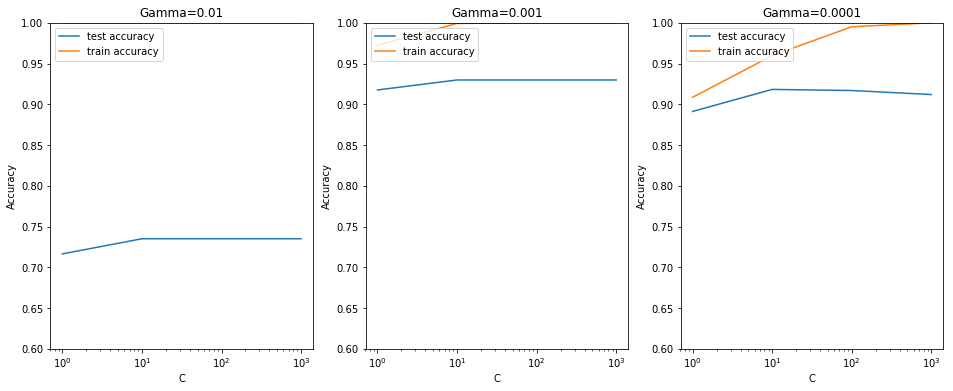

In [13]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [14]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9299319727891157 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [15]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9424603174603174 

[[263   0   6   0   0   0   0   0   0   0]
 [  0 264   2   0   1   0   0   0   1   2]
 [  0   3 237   3   3   0   1   2   5   0]
 [  0   3   7 258   0   2   0   1   3   1]
 [  0   0   2   0 230   1   1   0   0   7]
 [  0   2   4   5   2 205   2   0   1   0]
 [  6   1   5   0   1   2 254   0   0   0]
 [  1   1   5   1   1   0   0 237   0   4]
 [  2   1   6   8   0   4   0   0 210   3]
 [  2   0   4   3   4   0   0   7   0 217]] 



In [16]:
test = pd.read_csv('test.csv')

In [17]:
test_scaled = scale(test)

In [18]:
digit_pred = model.predict(test_scaled)

In [19]:
df = pd.DataFrame({'ImageId':np.arange(1, len(digit_pred)+1),'Label':digit_pred})

In [20]:
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [21]:
df.to_csv('submission.csv', encoding='utf-8', index=False)